In [1201]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from statistics import mode

import re

from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.random.set_seed(123)

import asyncio

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#C:\Users\huai\.homejupyter

#import os
#for dirname, _, filenames in os.walk('C:/Users/huai/.homejupyter'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


# Step 1.瀏覽資料

In [931]:
train = pd.read_csv("Titanic_train.csv" )
tit1 = train.select_dtypes(include=['float64','int64','object'])
train.info()

test = pd.read_csv("Titanic_test.csv")
tit2 = test.select_dtypes(include=['float64','int64','object'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        943 non-null    int64  
 1   pclass    943 non-null    int64  
 2   survived  943 non-null    int64  
 3   name      943 non-null    object 
 4   sex       943 non-null    object 
 5   age       750 non-null    float64
 6   sibsp     943 non-null    int64  
 7   parch     943 non-null    int64  
 8   ticket    943 non-null    object 
 9   fare      942 non-null    float64
 10  cabin     212 non-null    object 
 11  embarked  942 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 88.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        366 non-null    int64  
 1   pclass    366 non-null    int64  
 2   name      366 non-nu

# Step 2 資料整理

## 2.1 填空

In [932]:
train.isnull()

,ID,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
938,False,False,False,False,False,True,False,False,False,False,True,False
939,False,False,False,False,False,True,False,False,False,False,True,False
940,False,False,False,False,False,True,False,False,False,False,True,False
941,False,False,False,False,False,False,False,False,False,False,True,False


In [933]:
train.isnull().sum()

ID            0
pclass        0
survived      0
name          0
sex           0
age         193
sibsp         0
parch         0
ticket        0
fare          1
cabin       731
embarked      1
dtype: int64

In [934]:
train['cabin'] = train['cabin'].fillna('X')
test['cabin'] = test['cabin'].fillna('X')
#cabin     客艙編號
#.fillna: 填滿單column表格元素

Text(0.5, 1.0, 'AGE')

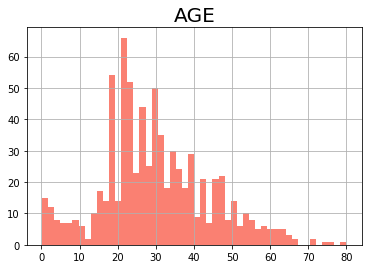

In [935]:
train['age'].hist(bins=50,color='salmon')
plt.title("AGE",size=20)

In [936]:
age_group = train.groupby("pclass")["age"]
print(age_group.median())
print(age_group.mean())
#groupby contains info of frame 

pclass
1    38.0
2    28.5
3    24.0
Name: age, dtype: float64
pclass
1    39.058703
2    29.464286
3    25.056849
Name: age, dtype: float64


In [937]:
pd.DataFrame(age_group)

,0,1
0,1,0 29.0000 1 0.9167 2 30.0000 3...
1,2,232 28.0 233 30.0 234 25.0 235 34....
2,3,426 42.0 427 20.0 428 18.0 429 30....


In [938]:
train.loc[train.age.isnull(),'age'] = train.groupby("pclass").age.transform('median')
test.loc[test.age.isnull(),'age'] = test.groupby("pclass").age.transform('median')
print(train['age'].isnull().sum())

0


In [939]:
train["embarked"] = train["embarked"].fillna(mode(train["embarked"]))
test["embarked"] = test["embarked"].fillna(mode(test["embarked"]))
train["fare"] = train["fare"].fillna(mode(train["fare"]))

mode() 离散的或标称的数据的单模（最常见的值）。

In [940]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

ID          0
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

ID          0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64


## 2.2 數值化

### 2.2.1 船艙 

In [941]:
print(train['cabin'].unique().tolist())
print()
print(test['cabin'].unique().tolist())

['B5', 'C22 C26', 'C101', 'C62 C64', 'B35', 'X', 'A23', 'D15', 'C6', 'D35', 'C148', 'B49', 'C99', 'C52', 'T', 'A31', 'C7', 'C103', 'E33', 'A21', 'B10', 'B4', 'E40', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E8', 'B61', 'B77', 'A9', 'C89', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85', 'B71', 'B20', 'A34', 'B58 B60', 'C86', 'A20', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C23 C25 C27', 'E36', 'D34', 'D40', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49', 'B52 B54 B56', 'C132', 'B37', 'D21', 'D19', 'D17', 'B101', 'D28', 'D6', 'D9', 'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C118', 'D36', 'D48', 'C105', 'B36', 'B30', 'C124', 'C2', 'C65', 'C104', 'C110', 'B3', 'A24', 'A32', 'A11', 'B57 B59 B63 B66', 'C28', 'E44', 'A26', 'A6', 'A7', 'C31', 'B45', 'E34', 'B78', 'B50', 'C116', 'C55 C57', 'D50', 'E67', 'C126', 'C68', 'C70', 'C53', 'B19', 'D

In [942]:
train['cabin'] = train['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
print("train['cabin']:", train['cabin'].unique().tolist())

test['cabin'] = test['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
print("test['cabin']:", test['cabin'].unique().tolist())


train['cabin']: ['B', 'C', 'X', 'A', 'D', 'T', 'E', 'F', 'G']
test['cabin']: ['C', 'E', 'D', 'A', 'X', 'B', 'F', 'G']


In [943]:
category_1 = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'X':11, 'T':12}
#category = {'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'X':0, 'T':0}

train['cabin'] = train['cabin'].map(category_1)
print("train['cabin']:", train['cabin'].unique().tolist())

test['cabin'] = test['cabin'].map(category_1)
print("test['cabin']:", test['cabin'].unique().tolist())

train['cabin']: [2, 3, 11, 1, 4, 12, 5, 6, 7]
test['cabin']: [3, 5, 4, 1, 11, 2, 6, 7]


### 2.2.2 性別、登船處 

In [944]:
category_2 = {"male": 0, "female": 1}
category_3 = {"S": 0, "C": 1, "Q": 2}

train["sex"] = train["sex"].map(category_2)
print(train['sex'].unique().tolist())

test["sex"] = test["sex"].map(category_2)
print(test['sex'].unique().tolist())

train["embarked"] = train["embarked"].map(category_3)
print(train["embarked"].unique().tolist())

test["embarked"] = test["embarked"].map(category_3)
print(test["embarked"].unique().tolist())

[1, 0]
[1, 0]
[0, 1, 2]
[0, 1, 2]


### 2.2.3 家屬 

In [945]:
train['fam'] = train['sibsp'] + train['parch']
test['fam'] = test['sibsp'] + test['parch']

### 2.2.4 年齡

#### way_original

In [946]:
#train['age'] = train['age'].astype(str)
#test['age'] = test['age'].astype(str)

In [947]:
#train['age'] = train['age'].map(lambda x: re.compile("[0-9]").search(x).group())
#train['age'].unique().tolist()

#test['age'] = test['age'].map(lambda x: re.compile("[0-9]").search(x).group())
#test['age'].unique().tolist()

#### way_demo_1

In [948]:
train['age'] = (train['age']/5).astype(int)
test['age'] = (test['age']/5).astype(int)

In [949]:
(train['age']/5).astype(int).unique().tolist()

[1, 0, 2, 3]

### 2.2.5 頭銜

In [950]:
train['Title'] = train['name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
test['Title'] = test['name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
print("train['Title']:", train['Title'].unique().tolist())
print()
print("test['Title']:", test['Title'].unique().tolist())

train['Title']: ['Miss.', 'Master.', 'Mr.', 'Mrs.', 'Col.', 'Mme.', 'Dr.', 'Sir.', 'Mlle.', 'Dona.', 'Major.', 'Countess.', 'Don.', 'Rev.', 'Ms.']

test['Title']: ['Miss.', 'Mrs.', 'Mr.', 'Major.', 'Master.', 'Capt.', 'Lady.', 'Dr.', 'Jonkheer.', 'Mlle.', 'Col.', 'Rev.', 'Ms.']


In [951]:
train['Title'] = train['Title'].replace(
    ['Col.', 'Dr.', 'Jonkheer.', 'Capt.'], 'Rare.')
train['Title'] = train['Title'].replace(
    ['Countess.', 'Lady.', 'Lady', 'Sir', 'Sir.', 'Major.','Mme.',
    'Dona.', 'Mlle.', 'Jonkheer.'],
    'Royal.')
train['Title'] = train['Title'].replace(['Don.'], 'Mr.')

train[['Title', 'survived']].groupby(['Title'], as_index=False).mean()

,Title,survived
0,Master.,0.534884
1,Miss.,0.687179
2,Mr.,0.156934
3,Mrs.,0.781955
4,Ms.,0.000000
5,Rare.,0.600000
6,Rev.,0.000000
7,Royal.,1.000000


In [952]:
test['Title'] = test['Title'].replace(
    ['Col.', 'Dr.', 'Jonkheer.', 'Capt.'], 'Rare.')
test['Title'] = test['Title'].replace(
    ['Countess.', 'Lady.', 'Lady', 'Sir', 'Sir.', 'Major.','Mme.',
    'Dona.', 'Mlle.', 'Jonkheer.'],
    'Royal.')
test['Title'] = test['Title'].replace(['Don.'], 'Mr.')

In [953]:
title_mapping = {"Mr.": 1 , "Miss.": 2 , "Mrs.": 3 , "Master.": 4 , "Royal.": 5 , "Rare.": 6 , "Ms.": 7 , "Rev.": 8 }
train['Title'] = train['Title'].map(title_mapping)

#train['Title'] = train['Title'].fillna(0)
print(train['Title'].unique().tolist())
print(train['Title'].isnull().sum())

[2, 4, 1, 3, 6, 5, 8, 7]
0


In [954]:
test['Title'] = test['Title'].map(title_mapping)

#test['Title'] = test['Title'].fillna(0)
print(test['Title'].unique().tolist())
print(train['Title'].isnull().sum())

[2, 3, 1, 5, 4, 6, 8, 7]
0


### 2.2.6 結果

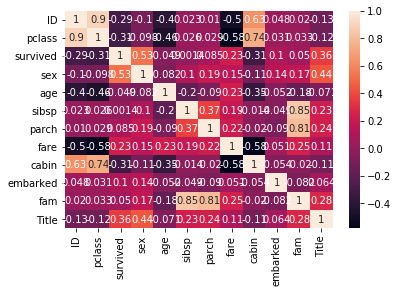

In [955]:
sns.heatmap(train.corr(), annot = True)

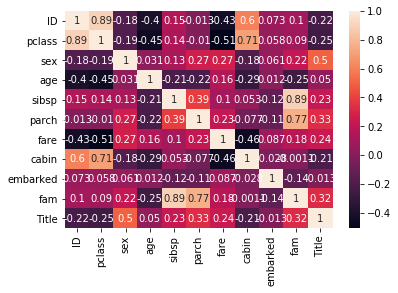

In [956]:
sns.heatmap(test.corr(), annot = True)

### 2.2.7 結果去留

In [957]:
test = test.drop(['ticket'], axis = 1)
test = test.drop(['name'], axis = 1)
test = test.drop(['parch'], axis = 1)
test = test.drop(['sibsp'], axis = 1)

#test = test.drop(['age'], axis = 1)
test = test.drop(['fam'], axis = 1)
#test = test.drop(['pclass'], axis = 1)
#test = test.drop(['Title'], axis = 1)
#test = test.drop(['sex'], axis = 1)
#test = test.drop(['fare'], axis = 1)
test = test.drop(['embarked'], axis = 1)

train.drop(['name', 'ticket'], axis = 1, inplace = True)
train = train.drop(['parch'], axis = 1)
train = train.drop(['sibsp'], axis = 1)

#train = train.drop(['age'], axis = 1)
train = train.drop(['fam'], axis = 1)
#train = train.drop(['pclass'], axis = 1)
#train = train.drop(['Title'], axis = 1)
#train = train.drop(['sex'], axis = 1)
#train = train.drop(['fare'], axis = 1)
train = train.drop(['embarked'], axis = 1)

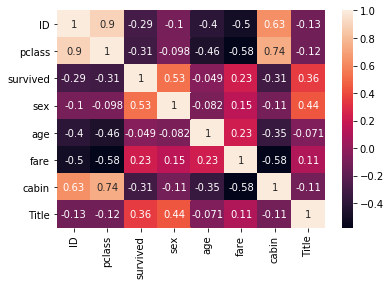

In [958]:
sns.heatmap(train.corr(), annot = True)

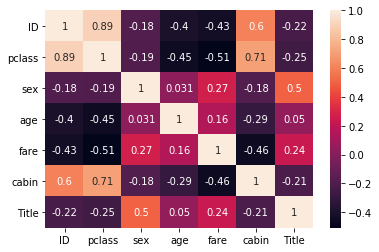

In [959]:
sns.heatmap(test.corr(), annot = True)

# Step 3.訓練模型

## 3.1 通用模板_sklearn

In [1184]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['survived','ID'], axis=1), 
    train['survived'], 
    test_size = 0.4, 
    random_state = 0)

## 3.2 LOGISTIC REGRESSION_sklearn

In [1111]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(
    max_iter = 50000
)
log.fit(X_train, y_train)
score_log = log.score(X_train, y_train)
pred_log = log.predict(X_test)
acc_log = round(accuracy_score(pred_log, y_test) * 100, 2)
print(score_log)
print(acc_log)

0.8053097345132744
78.31


In [1114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_log))
tn, fp, fn, tp = confusion_matrix(y_test, pred_log).ravel()

[[190  35]
 [ 47 106]]


In [1113]:
accuracy=((tp+tn)/(tp+tn+fp+fn))
print('accuracy is: ', (round(accuracy, 2)*100))

accuracy is:  79.0


## 3.3 RANDOM FOREST_sklearn

In [1206]:
from sklearn.ensemble import RandomForestClassifier

# Define our optimal randomForest algo
randomforest = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 10,
    max_features = 'auto',
    n_estimators = 500)
randomforest.fit(X_train, y_train)
score_randomforest = randomforest.score(X_train, y_train)
pred_randomforest = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(pred_randomforest, y_test) * 100, 2)
print(score_randomforest)
print(acc_randomforest)


0.9380530973451328
78.57


## 3.4 GRADIENT BOOSTING_sklearn

In [1209]:
from sklearn.ensemble import GradientBoostingClassifier

acc_gbk = 0
testacc = []

async def gbk_model():
    for i in range(100):
        gbk = GradientBoostingClassifier(
            learning_rate = 0.05,
            n_estimators = 100,
            subsample = 0.9
        )
        gbk.fit(X_train, y_train)
        score_gbk = gbk.score(X_train, y_train)
        pred_gbk = gbk.predict(X_test)
        acc_gbk = round(accuracy_score(pred_gbk, y_test) * 100, 2)
        print(score_gbk, acc_gbk)
        testacc.append(acc_gbk)
    
    return pd.Series(testacc).mean()

acc_gbk = round(await asyncio.create_task(gbk_model()), 2)
acc_gbk

0.8725663716814159 80.95
0.8761061946902655 80.95
0.8778761061946903 80.95
0.8778761061946903 80.16
0.8707964601769912 80.95
0.8690265486725663 80.42
0.8690265486725663 80.95
0.8725663716814159 80.69
0.8654867256637168 81.22
0.8654867256637168 81.48
0.8690265486725663 80.95
0.8654867256637168 80.42
0.8778761061946903 81.48
0.8725663716814159 80.95
0.8690265486725663 80.95
0.8707964601769912 80.69
0.8654867256637168 80.95
0.8743362831858407 81.48
0.8707964601769912 82.01
0.8707964601769912 80.69
0.8814159292035398 81.22
0.8725663716814159 81.22
0.8654867256637168 80.69
0.8672566371681416 80.16
0.8743362831858407 81.75
0.8761061946902655 80.95
0.8725663716814159 80.95
0.863716814159292 81.22
0.8743362831858407 80.69
0.8707964601769912 80.69
0.8778761061946903 80.16
0.8725663716814159 81.22
0.8707964601769912 80.69
0.8743362831858407 80.69
0.8690265486725663 80.95
0.8707964601769912 80.95
0.8672566371681416 81.22
0.8725663716814159 81.22
0.8654867256637168 80.69
0.8743362831858407 80.69
0

80.94

## 3.6 DecisionTreeClassifier_sklearn

In [1208]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion = 'entropy'
)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
acc_dtc = round(accuracy_score(pred_dtc, y_test) * 100, 2)
score_dtc = dtc.score(X_train, y_train)
print(score_dtc)
print(acc_dtc)

0.9610619469026549
73.28


## 3.7 Other_sklearn

In [1197]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors = 5,
    metric = 'minkowski',
    p = 2
)
knn.fit(X_train, y_train)
score_knn = knn.score(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = round(accuracy_score(pred_knn, y_test) * 100, 2)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(
    kernel = 'linear',
    random_state = 0
)
svc_lin.fit(X_train, y_train)
score_svc_lin = svc_lin.score(X_train, y_train)
pred_svc_lin = svc_lin.predict(X_test)
acc_svc_lin = round(accuracy_score(pred_svc_lin, y_test) * 100, 2)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(
    kernel = 'rbf',
    random_state = 0
)
svc_rbf.fit(X_train, y_train)
score_svc_rbf = svc_rbf.score(X_train, y_train)
pred_svc_rbf = svc_rbf.predict(X_test)
acc_svc_rbf = round(accuracy_score(pred_svc_rbf, y_test) * 100, 2)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB(
)
gauss.fit(X_train, y_train)
score_gauss = gauss.score(X_train,y_train)
pred_gauss = gauss.predict(X_test)
acc_gauss = round(accuracy_score(pred_gauss, y_test) * 100, 2)


# Step 4.預測結果

In [1210]:
see = {
    'TECHNIQUE':[
        'RANDOM FOREST',
        'LOGISTIC REGRESSION',
        'GRADIENT BOOSTING',
        'DecisionTreeClassifier',
        'KNeighborsClassifier',
        'Support Vector Machine Algorithm',
        'Kernel SVM Algorithm',
        'Naïve Bayes Algorithm'
        
    ],
    'SCORE':[
        score_randomforest* 100,
        score_log* 100,
        score_gbk* 100,
        score_dtc* 100,
        score_knn* 100,
        score_svc_lin* 100,
        score_svc_rbf* 100,
        score_gauss* 100
    ],
    'ACCURACY':[
        acc_randomforest,
        acc_LOG,
        acc_gbk,
        acc_dtc,
        acc_knn,
        acc_svc_lin,
        acc_svc_rbf,
        acc_gauss
    ]}
mod = pd.DataFrame(see)
mod

,TECHNIQUE,SCORE,ACCURACY
0,RANDOM FOREST,93.805310,78.57
1,LOGISTIC REGRESSION,80.530973,78.60
2,GRADIENT BOOSTING,87.256637,80.94
3,DecisionTreeClassifier,96.106195,73.28
4,KNeighborsClassifier,79.823009,74.60
5,Support Vector Machine Algorithm,78.584071,77.25
6,Kernel SVM Algorithm,67.610619,67.46
7,Naïve Bayes Algorithm,74.690265,77.25


# Step 5.產生檔案

In [ ]:
score = max(mod["ACCURACY"])
score

In [ ]:
inf_score = 82.84

In [ ]:
import time
current = str(time.strftime("%Y%m%d_%H%M%S", time.localtime()))
#D:\Desktop\soobi_practice
#C:/Users/huai/.homejupyter
name_for_csv = (
    'D:\Desktop\soobi_practice\demo2_' + str(score)+ '_'+ current + '.csv')
print(name_for_csv)


ids = test['ID']
predictions = gbk.predict(test.drop('ID', axis=1))


output = pd.DataFrame({ 'ID' : ids, 'survived': predictions })
if score > inf_score:
    output.to_csv(name_for_csv, index=False)
else:
    print("under", inf_score)

In [ ]:
#output.to_csv(name_for_csv, index=False)